In [1]:
import python_inventory as pyinv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/Duncan.csv")
df

,name,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


In [4]:
def name2id(name):
    if name == 'bc':
        return 1
    if name == 'wc':
        return 1
    else:
        return 2

# profid = df['type'].apply(name2id)
# profid
    
df['profid'] = df['type'].apply(name2id)


In [5]:
income = df['income'].values
education = df['education'].values
prestige = df['prestige'].values
profid = df['profid'].values

In [6]:
import matplotlib.pyplot as plt

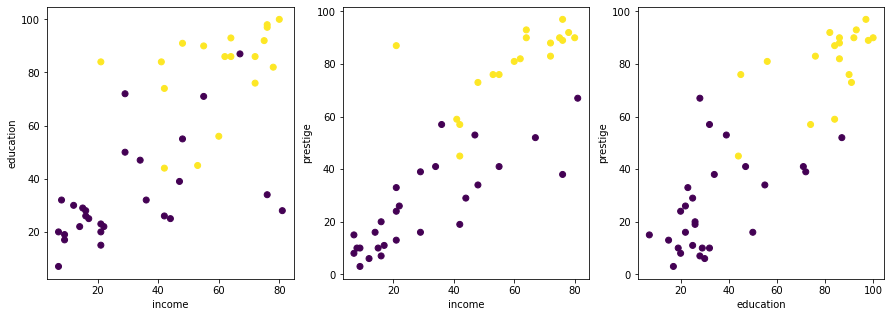

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(income, education, c=profid)
plt.xlabel('income')
plt.ylabel('education')
plt.subplot(1,3,2)
plt.scatter(income, prestige, c=profid)
plt.xlabel('income')
plt.ylabel('prestige')
plt.subplot(1,3,3)
plt.scatter(education, prestige, c=profid)
plt.xlabel('education')
plt.ylabel('prestige')
plt.show()

In [8]:
import numpy as np

In [9]:
X = np.c_[education, prestige]

In [51]:
kmm = pyinv.KMeansMahalanobis(2)

In [52]:
kmm.fit(X)

31.72586354806449
1.945363839827661
2.3473235104103187
2.6364411610094547
2.080976671019028
0.0


In [53]:
XX, YY = np.meshgrid(np.linspace(0,100,100), np.linspace(0,100,100))
XY = np.c_[(XX.ravel(), YY.ravel())]

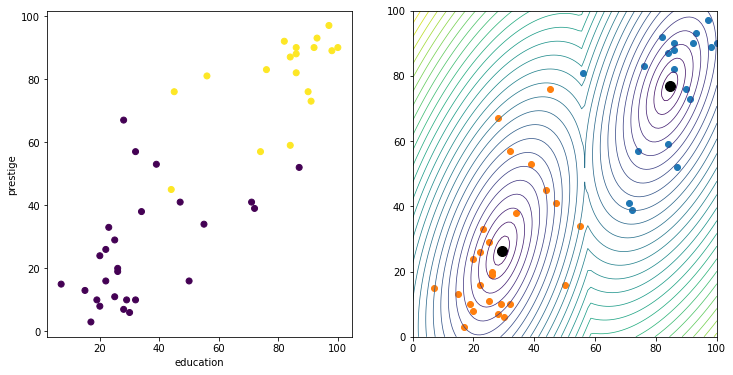

In [54]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(education, prestige, c=profid)
plt.xlabel('education')
plt.ylabel('prestige')

plt.subplot(1,2,2)
for j, Ij in enumerate(kmm.I):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(kmm.c[:,0], kmm.c[:,1], c='k', s=100)

Z = np.fromiter((kmm.dist(xy) for xy in XY), 'd', len(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(0,100,0,100), linewidths=0.75)

plt.show()

In [20]:
6/len(X)

0.13333333333333333

In [85]:
rhofunc = pyinv.SoftQuantileFunc(pyinv.SoftAbs(0.001), 0.85)
avrfunc = pyinv.WMMean(rhofunc)
kmm_rob = pyinv.RKMeansMahalanobis(2, avrfunc, tol=1.0e-6)

In [86]:
kmm_rob.fit(X)

25.05073982393329
12.371307714233646
4.282417581928024
2.4424219448626716
3.798468692293419e-11


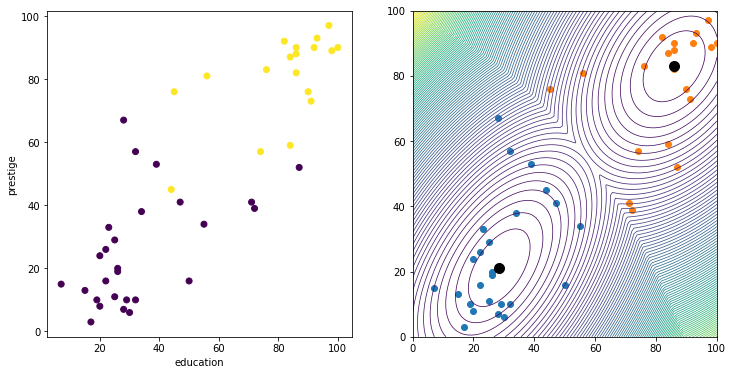

In [87]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(education, prestige, c=profid)
plt.xlabel('education')
plt.ylabel('prestige')

plt.subplot(1,2,2)
for j, Ij in enumerate(kmm_rob.I):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(kmm_rob.c[:,0], kmm_rob.c[:,1], c='k', s=100)

Z = np.fromiter((kmm_rob.dist2(xy) for xy in XY), 'd', len(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 100), extent=(0,100,0,100), linewidths=0.75)

plt.show()